In [19]:
import numpy as np
import os

os.environ['CUDA_VISIBLE_DEVICES'] = '1'
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

In [11]:
actions = [
    'come',
    'away',
    'spin'
]

data = np.concatenate([
    np.load('dataset/seq_come_1627646273.npy'),
    np.load('dataset/seq_away_1627646273.npy'),
    np.load('dataset/seq_spin_1627646273.npy')
], axis=0)

data.shape

(1272, 30, 100)

In [12]:
x_data = data[:, :, :-1]
labels = data[:, 0, -1]

print(x_data.shape)
print(labels.shape)

(1272, 30, 99)
(1272,)


In [13]:
from tensorflow.keras.utils import to_categorical

y_data = to_categorical(labels, num_classes=len(actions))
y_data.shape

(1272, 3)

In [14]:
from sklearn.model_selection import train_test_split

x_data = x_data.astype(np.float32)
y_data = y_data.astype(np.float32)

x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size=0.1, random_state=2021)

print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)

(1144, 30, 99) (1144, 3)
(128, 30, 99) (128, 3)


In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential([
    LSTM(64, activation='relu', input_shape=x_train.shape[1:3]),
    Dense(32, activation='relu'),
    Dense(len(actions), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 64)                41984     
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 3)                 99        
                                                                 
Total params: 44,163
Trainable params: 44,163
Non-trainable params: 0
_________________________________________________________________


In [16]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

history = model.fit(
    x_train,
    y_train,
    validation_data=(x_val, y_val),
    epochs=200,
    callbacks=[
        ModelCheckpoint('models/model.h5', monitor='val_acc', verbose=1, save_best_only=True, mode='auto'),
        ReduceLROnPlateau(monitor='val_acc', factor=0.5, patience=50, verbose=1, mode='auto')
    ]
)

Epoch 1/200
35/36 [============================>.] - ETA: 0s - loss: 33.5562 - acc: 0.5054
Epoch 1: val_acc improved from -inf to 0.63281, saving model to models\model.h5
36/36 [==============================] - 3s 38ms/step - loss: 33.2950 - acc: 0.5070 - val_loss: 13.7419 - val_acc: 0.6328 - lr: 0.0010
Epoch 2/200
34/36 [===========================>..] - ETA: 0s - loss: 4.9580 - acc: 0.8401
Epoch 2: val_acc improved from 0.63281 to 0.82031, saving model to models\model.h5
36/36 [==============================] - 1s 21ms/step - loss: 4.8687 - acc: 0.8453 - val_loss: 2.4418 - val_acc: 0.8203 - lr: 0.0010
Epoch 3/200
35/36 [============================>.] - ETA: 0s - loss: 6.3168 - acc: 0.8161
Epoch 3: val_acc did not improve from 0.82031
36/36 [==============================] - 1s 22ms/step - loss: 6.1909 - acc: 0.8182 - val_loss: 1.1733 - val_acc: 0.7266 - lr: 0.0010
Epoch 4/200
36/36 [==============================] - ETA: 0s - loss: 0.8544 - acc: 0.8147
Epoch 4: val_acc improved fro

36/36 [==============================] - 1s 18ms/step - loss: 0.0916 - acc: 0.9642 - val_loss: 0.0773 - val_acc: 0.9531 - lr: 0.0010
Epoch 31/200
36/36 [==============================] - ETA: 0s - loss: 0.0936 - acc: 0.9729
Epoch 31: val_acc did not improve from 1.00000
36/36 [==============================] - 1s 17ms/step - loss: 0.0936 - acc: 0.9729 - val_loss: 0.0509 - val_acc: 0.9766 - lr: 0.0010
Epoch 32/200
34/36 [===========================>..] - ETA: 0s - loss: 0.0693 - acc: 0.9825
Epoch 32: val_acc did not improve from 1.00000
36/36 [==============================] - 1s 17ms/step - loss: 0.0693 - acc: 0.9816 - val_loss: 0.1045 - val_acc: 0.9453 - lr: 0.0010
Epoch 33/200
35/36 [============================>.] - ETA: 0s - loss: 0.1245 - acc: 0.9536
Epoch 33: val_acc did not improve from 1.00000
36/36 [==============================] - 1s 16ms/step - loss: 0.1222 - acc: 0.9545 - val_loss: 0.0656 - val_acc: 0.9688 - lr: 0.0010
Epoch 34/200
36/36 [==============================] - 

Epoch 61/200
35/36 [============================>.] - ETA: 0s - loss: 0.0755 - acc: 0.9768
Epoch 61: val_acc did not improve from 1.00000
36/36 [==============================] - 1s 16ms/step - loss: 0.0739 - acc: 0.9773 - val_loss: 0.0481 - val_acc: 0.9688 - lr: 0.0010
Epoch 62/200
35/36 [============================>.] - ETA: 0s - loss: 0.0889 - acc: 0.9750
Epoch 62: val_acc did not improve from 1.00000
36/36 [==============================] - 1s 18ms/step - loss: 0.0888 - acc: 0.9747 - val_loss: 0.1358 - val_acc: 0.9531 - lr: 0.0010
Epoch 63/200
35/36 [============================>.] - ETA: 0s - loss: 0.0834 - acc: 0.9732
Epoch 63: val_acc did not improve from 1.00000
36/36 [==============================] - 1s 16ms/step - loss: 0.0843 - acc: 0.9720 - val_loss: 0.1292 - val_acc: 0.9531 - lr: 0.0010
Epoch 64/200
33/36 [==========================>...] - ETA: 0s - loss: 0.1087 - acc: 0.9678
Epoch 64: val_acc did not improve from 1.00000
36/36 [==============================] - 1s 15ms/

Epoch 91/200
33/36 [==========================>...] - ETA: 0s - loss: 0.0279 - acc: 0.9905
Epoch 91: val_acc did not improve from 1.00000
36/36 [==============================] - 1s 15ms/step - loss: 0.0265 - acc: 0.9913 - val_loss: 0.0176 - val_acc: 0.9922 - lr: 5.0000e-04
Epoch 92/200
36/36 [==============================] - ETA: 0s - loss: 0.0301 - acc: 0.9904
Epoch 92: val_acc did not improve from 1.00000
36/36 [==============================] - 1s 18ms/step - loss: 0.0301 - acc: 0.9904 - val_loss: 0.0208 - val_acc: 0.9922 - lr: 5.0000e-04
Epoch 93/200
36/36 [==============================] - ETA: 0s - loss: 0.0245 - acc: 0.9895
Epoch 93: val_acc did not improve from 1.00000
36/36 [==============================] - 1s 16ms/step - loss: 0.0245 - acc: 0.9895 - val_loss: 0.0467 - val_acc: 0.9766 - lr: 5.0000e-04
Epoch 94/200
35/36 [============================>.] - ETA: 0s - loss: 0.0409 - acc: 0.9848
Epoch 94: val_acc did not improve from 1.00000
36/36 [==============================

36/36 [==============================] - 1s 15ms/step - loss: 0.0112 - acc: 0.9948 - val_loss: 0.0210 - val_acc: 0.9922 - lr: 5.0000e-04
Epoch 121/200
34/36 [===========================>..] - ETA: 0s - loss: 0.0081 - acc: 0.9982
Epoch 121: val_acc did not improve from 1.00000
36/36 [==============================] - 1s 15ms/step - loss: 0.0082 - acc: 0.9983 - val_loss: 0.0174 - val_acc: 0.9922 - lr: 2.5000e-04
Epoch 122/200
34/36 [===========================>..] - ETA: 0s - loss: 0.0111 - acc: 0.9954
Epoch 122: val_acc did not improve from 1.00000
36/36 [==============================] - 1s 18ms/step - loss: 0.0108 - acc: 0.9956 - val_loss: 0.0135 - val_acc: 0.9922 - lr: 2.5000e-04
Epoch 123/200
33/36 [==========================>...] - ETA: 0s - loss: 0.0080 - acc: 0.9972
Epoch 123: val_acc did not improve from 1.00000
36/36 [==============================] - 1s 16ms/step - loss: 0.0075 - acc: 0.9974 - val_loss: 0.0126 - val_acc: 1.0000 - lr: 2.5000e-04
Epoch 124/200
36/36 [===========

35/36 [============================>.] - ETA: 0s - loss: 0.0013 - acc: 1.0000
Epoch 179: val_acc did not improve from 1.00000
36/36 [==============================] - 1s 23ms/step - loss: 0.0013 - acc: 1.0000 - val_loss: 0.0033 - val_acc: 1.0000 - lr: 1.2500e-04
Epoch 180/200
36/36 [==============================] - ETA: 0s - loss: 0.0013 - acc: 1.0000    
Epoch 180: val_acc did not improve from 1.00000
36/36 [==============================] - 1s 18ms/step - loss: 0.0013 - acc: 1.0000 - val_loss: 0.0092 - val_acc: 1.0000 - lr: 1.2500e-04
Epoch 181/200
35/36 [============================>.] - ETA: 0s - loss: 0.0016 - acc: 1.0000
Epoch 181: val_acc did not improve from 1.00000
36/36 [==============================] - 1s 19ms/step - loss: 0.0016 - acc: 1.0000 - val_loss: 0.0119 - val_acc: 0.9922 - lr: 1.2500e-04
Epoch 182/200
33/36 [==========================>...] - ETA: 0s - loss: 0.0013 - acc: 1.0000
Epoch 182: val_acc did not improve from 1.00000
36/36 [==============================] 

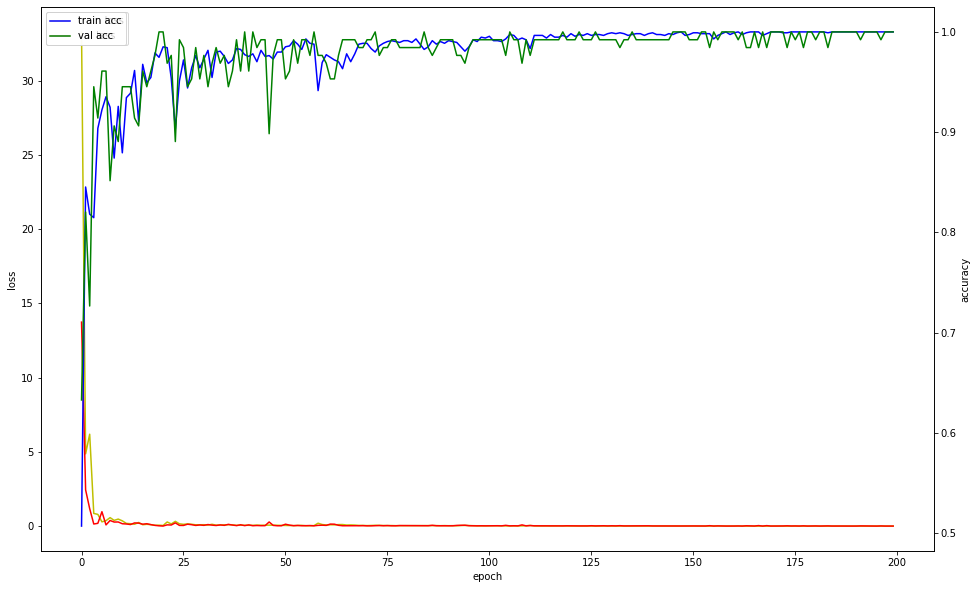

In [17]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots(figsize=(16, 10))
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history.history['acc'], 'b', label='train acc')
acc_ax.plot(history.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()

In [18]:
from sklearn.metrics import multilabel_confusion_matrix
from tensorflow.keras.models import load_model

model = load_model('models/model.h5')

y_pred = model.predict(x_val)

multilabel_confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))

4/4 [==============================] - 0s 9ms/step


array([[[94,  0],
        [ 0, 34]],

       [[81,  0],
        [ 0, 47]],

       [[81,  0],
        [ 0, 47]]], dtype=int64)